In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [2]:
class Population():
    def __init__(self, batch, distance):
        self.batch = batch
        self.parent = []
        self.score = 0
        self.best_dis = None
        self.distance = distance

In [3]:
def init_pop(cities, distance, popSize):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(popSize)]), 
        distance
    )

In [5]:
def fitness(self, chromosome):
    return sum(
        [
            self.distance[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )
Population.fitness = fitness

In [7]:
def selection(self, k=4):
    fit = self.bestRoute()
    while len(self.parent) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
            self.parent.append(self.batch[idx])
    self.parent = np.asarray(self.parent)
Population.selection = selection    

In [8]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [9]:
def crossover(self, crossoverRate=0.1):
    children = []
    count, size = self.parent.shape
    for _ in range(len(self.batch)):
        if np.random.rand() > crossoverRate:
            children.append(
                list(self.parent[np.random.randint(count, size=1)[0]])
            )
        else:
            parent1, parent2 = self.parent[
                np.random.randint(count, size=2), :
            ]
            idx = np.random.choice(range(size), size=2, replace=False)
            start, end = min(idx), max(idx)
            child = [None] * size
            for i in range(start, end + 1, 1):
                child[i] = parent1[i]
            pointer = 0
            for i in range(size):
                if child[i] is None:
                    while parent2[pointer] in child:
                        pointer += 1
                    child[i] = parent2[pointer]
            children.append(child)
    return children
Population.crossover = crossover

In [ ]:
def mutate(self, crossoverRate=0.1, mutationRate=0.1):
    next_bag = []
    children = self.crossover(crossoverRate)
    for child in children:
        if np.random.rand() < mutationRate:
            next_bag.append(swap(child))
        else:
            next_bag.append(child)
    return next_bag
    
Population.mutate = mutate

In [11]:
def genetic_algorithm(
    cities,
    distance,
    popSize=500,
    generation=500,
    selectivity=0.05,
    crossoverRate=0.7,
    mutationRate=0.05,
    print_interval=50,
    return_history=True,
    verbose=False,
):
    pop = init_pop(cities, distance, popSize)
    best_dis = pop.best_dis
    score = float("inf")
    history = []
    for i in range(generation):
        pop.selection(popSize * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best_dis = pop.best_dis
            score = pop.score
        children = pop.mutate(crossoverRate, mutationRate)
        pop = Population(children, pop.distance)
    if return_history:
        return best_dis, history
    return best_dis

In [12]:
def make_mat(coordinates):
    res = [
        [get_distance(city1, city2) for city2 in coordinates]
        for city1 in coordinates
    ]
    return np.asarray(res)

def get_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

In [13]:
def better_generate_cities(n_cities, factor=0.2):
    x = np.asarray(range(int(-n_cities / 2), int(n_cities / 2) + 1, 1))
    y = np.sqrt(n_cities ** 2 / 4 - x ** 2)
    return np.asarray(list(zip(x, y)))

Generation 0: 3027.006549617485
Generation 50: 1906.755676555005
Generation 100: 1487.210563722261
Generation 150: 1317.835701588798
Generation 200: 1060.8918890250925
Generation 250: 982.7510373325488
Generation 300: 931.7940471256276
Generation 350: 915.7624827803849
Generation 400: 889.1883646208378
Generation 450: 871.5031915921383


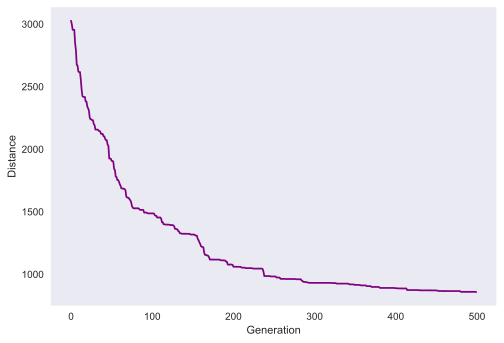

[72, 68, 66, 34, 27, 12, 10, 9, 4, 2, 3, 5, 36, 37, 24, 63, 67, 70, 71, 78, 88, 90, 94, 83, 76, 64, 61, 57, 51, 50, 45, 44, 42, 41, 39, 31, 29, 30, 25, 23, 22, 21, 18, 17, 16, 28, 32, 33, 35, 40, 38, 43, 46, 48, 49, 53, 54, 60, 69, 73, 75, 77, 80, 81, 59, 52, 47, 55, 56, 62, 65, 79, 82, 92, 93, 95, 97, 89, 87, 0, 1, 6, 13, 14, 15, 19, 20, 26, 58, 74, 84, 85, 86, 91, 96, 98, 99, 7, 8, 11]


In [19]:
cities = range(100)
city_coordinates = better_generate_cities(len(cities))
distance = make_mat(city_coordinates)
best_dis, history = genetic_algorithm(cities, distance)
plt.plot(range(len(history)), history, color="purple")
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.grid(False)
plt.show()
print(best_dis)